In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

!tar jxf "/content/gdrive/My Drive/RML2016.10b.tar.bz2" -C "/content/gdrive/My Drive/a"

tar (child): /content/gdrive/My Drive/RML2016.10b.tar.bz2: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


10
20
['8PSK', 'AM-DSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
200
mod =  8PSK
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
mod =  AM-DSB
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
mod =  BPSK
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(600

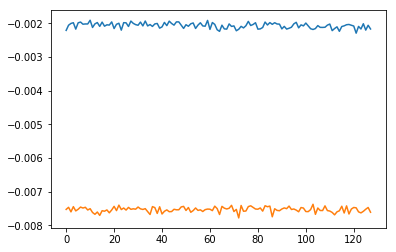

In [0]:
import pickle
import numpy as np
''' 
    the data set has 10 modulations
    for each modulation we have 20 snr
    for each modulation/snr we have 1000 instance
    ************************************************************************
                                for example 
    8 PSK modulation has 20 snr values from -20 to 18 with step value = 2
    for each value of the snr for 8 PSK modulation we have 1000 example 
    and the same for each modulation 
    so for every modulation we have 20(snrs)*6000=120000 example
    ************************************************************************
    the dataset =10 (modulation)* 120000(example for each modulation)=120000 example
     
'''

a=open("/content/gdrive/My Drive/a/RML2016.10b.dat",'rb')
u = pickle._Unpickler(a)
u.encoding = 'latin1'
Xd = u.load()

# Xd = pickle.load(a)
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
print(len(mods))
print(len(snrs))
print(mods)
print(snrs)
print(len(mods)*len(snrs))
# clasees=np.zeros(shape=1200000)
# dataset_snrs=np.zeros(shape=1200000)
j=0
classes_index=0

mod_to_int={}
for mod in mods:
    j+=1
    print('mod = ',mod)
    mod_to_int[j] = mod

    for snr in snrs:
        '''
        classes are the labels dataset each modulation will have a number from 1 to 11 
        mod to int is to map between numbers and clasees 
        dataset_snrs is all snr as a one vector to be more easier to deal with 
        
        '''

#         clasees[classes_index:classes_index + 6000]=j
#         dataset_snrs[classes_index:classes_index + 6000]=snr
        # print('snr ',snr)
        classes_index+=1000
        print(Xd[mod,snr].shape)
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
print(len(lbl))
import matplotlib.pyplot as plt
print(X[0][0].shape)
y=np.zeros(shape=128)
for i in range(0,128):
    y[i]=i
plt.plot(y,X[-8000][0])
plt.plot(y,X[-8000][1])
print(mod_to_int)
# plt.title((dataset_snrs[-8000] ," " , mod_to_int[int(clasees[-8000])]))
plt.show()


# Splitting Data

In [0]:
np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.5
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
# one hot encoding for multiclass classification since there are 11 classes (11 modulation techniques)
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))


in_shp = list(X_train.shape[1:])
# print(X_train.shape, "     ", in_shp)
print(in_shp+[1])
classes = mods

[2, 128, 1]


In [0]:
X_train.shape

(600000, 2, 128)

# Imports

In [0]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"  # Automatically runs on GPU if one detected
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import random, sys, keras

#Defining some varibales (Epochs ,Dropout rate , batch size)
dr = 0.005
# Set up some params for training
nb_epoch = 100    # number of epochs to train on
batch_size = 1024  # training batch size


Using TensorFlow backend.


# 1st - Fully connected neural network

In [0]:
#Build the N-Network
model = keras.models.Sequential()
model.add(Reshape(in_shp+[1], input_shape=in_shp))
model.add(Dropout(dr))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model.add(Dropout(dr))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense2"))
model.add(Dropout(dr))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', name="dense3"))
model.add(Dropout(dr))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', name="dense4"))
model.add(Dropout(dr))
model.add(Dense( len(classes), kernel_initializer='he_normal', name="dense5" ))
model.add(Activation('softmax'))
#Reshaping layer to output one of our 10 classes
model.add(Reshape([len(classes)]))

#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 128, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

# Perform training ...

In [0]:
filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
history=model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

Train on 570000 samples, validate on 30000 samples
Epoch 1/100
 - 12s - loss: 1.3031 - acc: 0.4451 - val_loss: 1.3011 - val_acc: 0.4497
Epoch 2/100
 - 12s - loss: 1.3010 - acc: 0.4463 - val_loss: 1.2926 - val_acc: 0.4509
Epoch 3/100
 - 13s - loss: 1.2989 - acc: 0.4467 - val_loss: 1.2917 - val_acc: 0.4538
Epoch 4/100
 - 12s - loss: 1.2973 - acc: 0.4469 - val_loss: 1.2953 - val_acc: 0.4525
Epoch 5/100
 - 13s - loss: 1.2946 - acc: 0.4480 - val_loss: 1.2830 - val_acc: 0.4557
Epoch 6/100
 - 13s - loss: 1.2935 - acc: 0.4482 - val_loss: 1.2867 - val_acc: 0.4517
Epoch 7/100
 - 13s - loss: 1.2925 - acc: 0.4489 - val_loss: 1.2988 - val_acc: 0.4456
Epoch 8/100
 - 14s - loss: 1.2902 - acc: 0.4495 - val_loss: 1.2892 - val_acc: 0.4528
Epoch 9/100
 - 11s - loss: 1.2886 - acc: 0.4504 - val_loss: 1.2916 - val_acc: 0.4503
Epoch 10/100
 - 11s - loss: 1.2875 - acc: 0.4501 - val_loss: 1.2827 - val_acc: 0.4565
Epoch 11/100
 - 11s - loss: 1.2851 - acc: 0.4519 - val_loss: 1.2888 - val_acc: 0.4535
Epoch 12/100

# Evaluation ( Show simple version of performance )

In [0]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print(model.metrics_names)
print(score)

600000/600000 [==============================] - 3s 6us/step
['loss', 'acc']
[1.2756312332344055, 0.46331166670481366]


# CNN using PDF Architecture

In [0]:
model2 = keras.models.Sequential()
model2.add(Reshape(in_shp+[1], input_shape=in_shp))
# no padding for the height and add padding to width (2 more columns)
model2.add(ZeroPadding2D((0, 2)))
model2.add(Conv2D(64, (1, 3), padding='valid', activation='relu', name="conv1",
                  kernel_initializer='glorot_uniform', data_format="channels_last"))
# Adding dropout to inputs to next layer to avoid over fitting
model2.add(Dropout(dr))
model2.add(ZeroPadding2D((0, 2)))
model2.add(Conv2D(16, (2, 3), padding='valid', activation='relu', name="conv2",
                  kernel_initializer='glorot_uniform', data_format="channels_last"))
model2.add(Dropout(dr))
# The coming layer is dense to we need to flatten our inputs
model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_initializer='he_normal', name="dense1"))
model2.add(Dropout(dr))
model2.add(Dense( len(classes), kernel_initializer='he_normal', name="dense2" ))
model2.add(Activation('softmax'))
model2.add(Reshape([len(classes)]))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
history=model2.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model2.load_weights(filepath)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 2, 132, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 130, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 130, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 2, 134, 64)        0         
_________________________________________________________________
conv2 (Conv2D)       

In [0]:
!cp "/convmodrecnets_CNN2_0.5.wts.h5" "/content/gdrive/My Drive/a/"

# Print SNRS Accuracies 

In [0]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

600000
1200000
Overall Accuracy:  0.10360029390154299
Overall Accuracy:  0.10904717359347856
Overall Accuracy:  0.11750591528643317
Overall Accuracy:  0.14141245018919735
Overall Accuracy:  0.18236432814898873
Overall Accuracy:  0.26696425597121826
Overall Accuracy:  0.37397537583380347
Overall Accuracy:  0.4871229582122457
Overall Accuracy:  0.6028186846138469
Overall Accuracy:  0.7085957389789629
Overall Accuracy:  0.7727196427971934
Overall Accuracy:  0.7998002663115845
Overall Accuracy:  0.8064580492833627
Overall Accuracy:  0.8139188069594034
Overall Accuracy:  0.8158130580542371
Overall Accuracy:  0.8186897239773862
Overall Accuracy:  0.8164569602556421
Overall Accuracy:  0.8151600597113949
Overall Accuracy:  0.8160589785502218
Overall Accuracy:  0.818157498746029


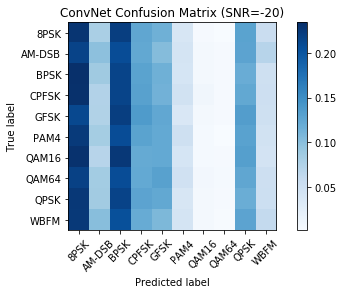

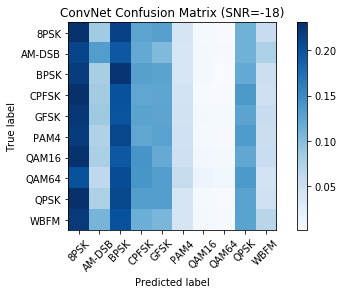

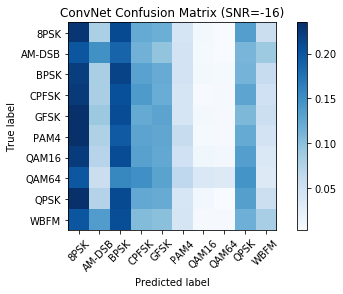

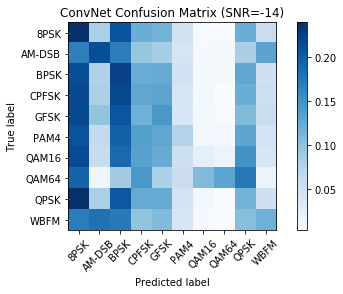

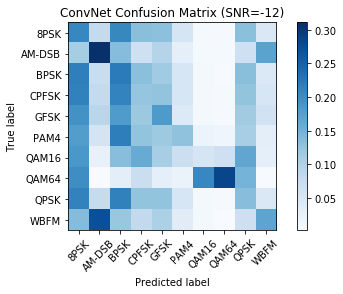

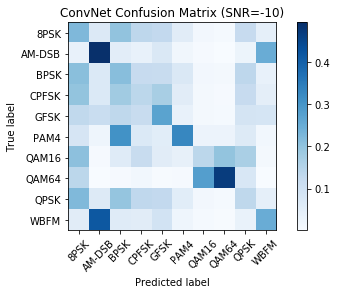

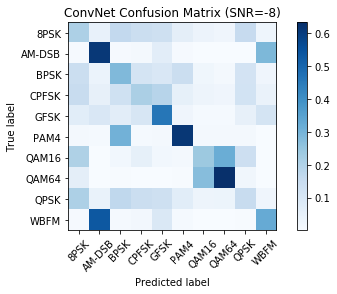

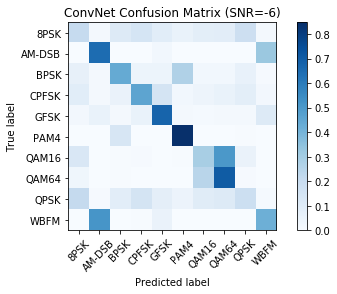

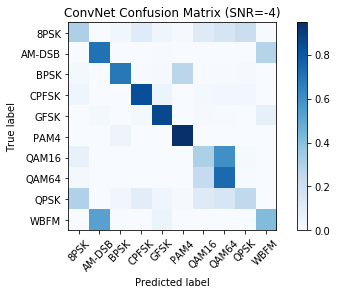

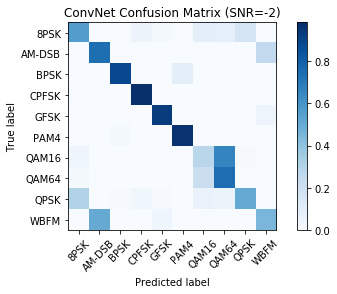

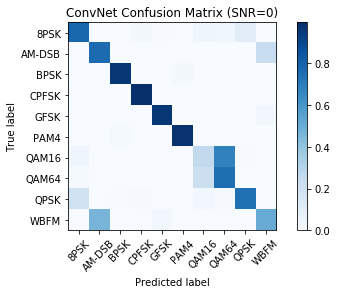

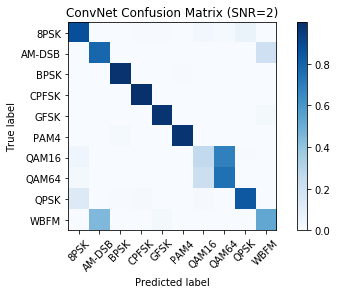

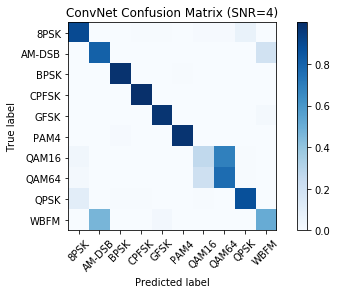

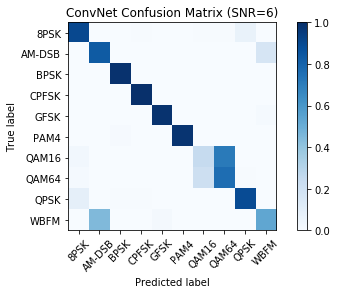

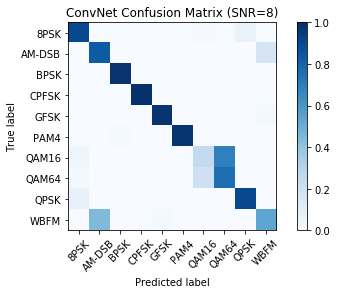

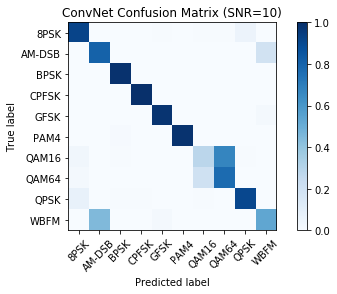

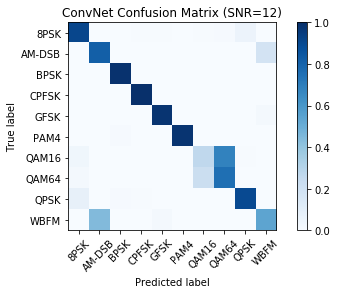

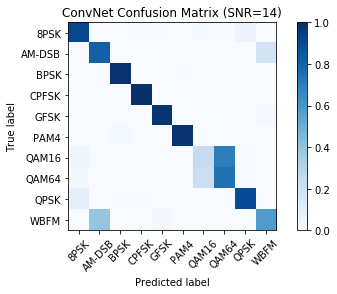

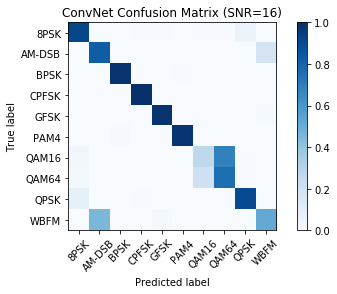

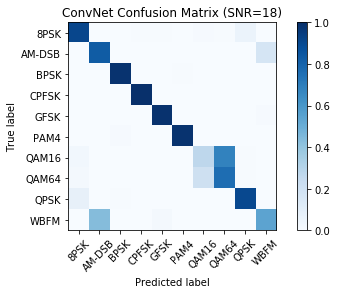

In [0]:
acc = {}
print(len(test_idx))
# index=np.array(test_idx)
i=0
a=np.array(lbl)
#print(a[index,0])
# print(test_idx[])
print(len(lbl))
test_SNRs=[]
for i in range(len(test_idx)):
  test_SNRs.append(lbl[test_idx[i]][1])
  
# for i in range()  
# test_SNRs=a[index,1]
# for i in range(len(test_idx)):
#   for j in range(len(lbl)):
# print((test_idx[0]))
# a=np.array(test_idx)
# ind=[i for i in range(len(test_idx)) where i =test_idx[i]]
# print(type(ind))
# a= np.array(lbl[test_idx][1])
# print(len(a))
for snr in snrs:

    # extract classes @ SNR
#     test_SNRs = map(lambda x: lbl[x][1], test_idx)
    
  
#     index=[for i in range ]
#     test_X_i = X_test[test_SNRs==snr]
#     test_X_i.reshape
#     print(X_test.shape)
#     print(test_X_i.shape, "shape")
#     test_Y_i = Y_test[test_SNRs==snr]    
#     test_SNRs = map(lambda x: lbl[x][1], test_idx)
    
#     index_SNRs=[j for j in range(len(test_idx)) if test_idx==lbl[x]]
#     test_SNRs=
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    
    # estimate classes
    test_Y_i_hat = model2.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print( "Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

# Evaluation for CNN 1

In [0]:
# Show simple version of performance
score = model2.evaluate(X_test, Y_test, batch_size=batch_size)
print(model2.metrics_names)
print(score)

600000/600000 [==============================] - 4s 6us/step
['loss', 'acc']
[1.0655528193950654, 0.5596216666285196]


In [0]:
model3 = keras.models.Sequential()
model3.add(Reshape(in_shp+[1], input_shape=in_shp))
# no padding for the height and add padding to width (2 more columns)
model3.add(ZeroPadding2D((0, 2)))
model3.add(Conv2D(64, (1, 3), padding='valid', activation='relu', name="conv1",
                  kernel_initializer='glorot_uniform', data_format="channels_last"))
# Adding dropout to inputs to next layer to avoid over fitting
model3.add(Dropout(dr))
model3.add(ZeroPadding2D((0, 2)))
model3.add(Conv2D(64, (2, 3), padding='valid', activation='relu', name="conv2",
                  kernel_initializer='glorot_uniform', data_format="channels_last"))
model3.add(Dropout(dr))
# The coming layer is dense to we need to flatten our inputs
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model3.add(Dropout(dr))
model3.add(Dense( len(classes), kernel_initializer='he_normal', name="dense2" ))
model3.add(Activation('softmax'))
model3.add(Reshape([len(classes)]))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

filepath = 'convmodrecnets_CNN3_0.5.wts.h5'
history=model3.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model3.load_weights(filepath)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_15 (Reshape)         (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 2, 132, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 130, 64)        256       
_________________________________________________________________
dropout_22 (Dropout)         (None, 2, 130, 64)        0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 2, 134, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 132, 64)        24640     
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 132, 64)        0         
__________

Text(0.5, 1.0, 'CNN2 Classification Accuracy on RadioML 2016.10 Alpha')

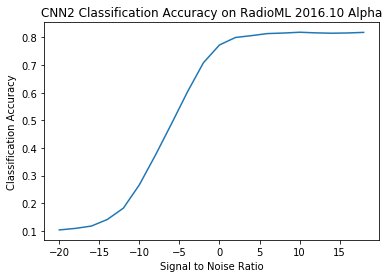

In [0]:
f=[]
for snr in snrs:
  f.append(acc[snr])
plt.plot(snrs, f)
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")

In [0]:
model4 = keras.models.Sequential()
model4.add(Reshape(in_shp+[1], input_shape=in_shp))
# no padding for the height and add padding to width (2 more columns)
model4.add(ZeroPadding2D((0, 2)))
model4.add(Conv2D(256, (1, 3), padding='valid', activation='relu', name="conv1",
                  kernel_initializer='glorot_uniform', data_format="channels_last"))
# Adding dropout to inputs to next layer to avoid over fitting
model4.add(Dropout(dr))
model4.add(ZeroPadding2D((0, 2)))
model4.add(Conv2D(256, (2, 3), padding='valid', activation='relu', name="conv2",
                  kernel_initializer='glorot_uniform', data_format="channels_last"))
model4.add(Dropout(dr))
# The coming layer is dense to we need to flatten our inputs
model4.add(Flatten())
model4.add(Dense(256, activation='relu', kernel_initializer='he_normal', name="dense1"))
model4.add(Dropout(dr))
model4.add(Dense( len(classes), kernel_initializer='he_normal', name="dense2" ))
model4.add(Activation('softmax'))
model4.add(Reshape([len(classes)]))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

filepath = 'convmodrecnets_CNN3_0.5.wts.h5'
history=model4.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model4.load_weights(filepath)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_21 (Reshape)         (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d_21 (ZeroPaddi (None, 2, 132, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 130, 256)       1024      
_________________________________________________________________
dropout_31 (Dropout)         (None, 2, 130, 256)       0         
_________________________________________________________________
zero_padding2d_22 (ZeroPaddi (None, 2, 134, 256)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 132, 256)       393472    
_________________________________________________________________
dropout_32 (Dropout)         (None, 1, 132, 256)       0         
__________